# SCREEN CAPTURE

In [59]:
## packages for Screen capture 
import pyscreenshot as ImageGrab
import time
## packages for generating dataset
import pandas as pd
import numpy as np
import cv2
import csv
import glob
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
## package for saving model
import joblib

In [32]:
def capture_image():
    images_folder='captured_images/9/'
    for i in range(0,50):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,250,550,700)) #x1,y1,x2,y2
        print("saved.....",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and re draw again........")

saved..... 0
clear screen and re draw again........
saved..... 1
clear screen and re draw again........
saved..... 2
clear screen and re draw again........
saved..... 3
clear screen and re draw again........
saved..... 4
clear screen and re draw again........
saved..... 5
clear screen and re draw again........
saved..... 6
clear screen and re draw again........
saved..... 7
clear screen and re draw again........
saved..... 8
clear screen and re draw again........
saved..... 9
clear screen and re draw again........
saved..... 10
clear screen and re draw again........
saved..... 11
clear screen and re draw again........
saved..... 12
clear screen and re draw again........
saved..... 13
clear screen and re draw again........
saved..... 14
clear screen and re draw again........
saved..... 15
clear screen and re draw again........
saved..... 16
clear screen and re draw again........
saved..... 17
clear screen and re draw again........
saved..... 18
clear screen and re draw again........
sav

# Generating Dataset

In [38]:
header=["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('digit_dataset.csv','a') as f:
    writer= csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
        roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows,cols=roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('digit_dataset.csv','a') as f:
            writer= csv.writer(f)
            writer.writerow(data)

In [40]:
data = pd.read_csv("digit_dataset.csv")
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
159,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X=data.drop(['label'],axis=1)
y=data['label']

In [45]:
print(X.shape,y.shape)

(500, 784) (500,)


6


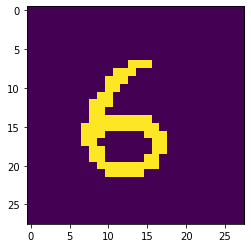

In [55]:
idx=314
img=X.loc[idx].values.reshape(28,28)
print(y.loc[idx])
plt.imshow(img)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [61]:
model_Svm=SVC(kernel="linear",random_state=6)
model_Svm.fit(X_train,y_train)
joblib.dump(model_Svm,"model/digit_rec_svm")

['model/digit_rec_svm']

In [62]:
model_Svm.score(X_test,y_test)

0.89

In [63]:
from sklearn import metrics

In [64]:
prediction=model_Svm.predict(X_test)
print("Accuracy= ",metrics.accuracy_score(prediction,y_test))

Accuracy=  0.89


# Prediction 

In [68]:
model=joblib.load("model/digit_rec_svm")
image_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(60,200,550,750)) #x1,y1,x2,y2
    
    img.save(image_folder+"img.png")
    im=cv2.imread(image_folder+"img.png")
    im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
    
    ret,im_th=cv2.threshold(im_gray,100,255,cv2.THRESH_BINARY)
    roi=cv2.resize(im_th,(28,28),interpolation=cv2.INTER_AREA)
    
    rows,cols=roi.shape
    
    X_pred=[]
    for i in range(rows):
        for j in range(cols):
            k=roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X_pred.append(k)
    predictions=model.predict([X_pred])
    print("Prediction:",predictions[0])
    cv2.putText(im,"MODEL PREDICTION IS:"+str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13:
        break
cv2.destroyAllWindows()

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9
Prediction: 9


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# ANN

In [185]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

In [126]:
model_ann=keras.Sequential([
    keras.layers.Dense(20,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
13/13 [==============================] - 1s 3ms/step - loss: 2.2780 - accuracy: 0.1525
Epoch 2/5
13/13 [==============================] - 0s 3ms/step - loss: 2.0465 - accuracy: 0.3675
Epoch 3/5
13/13 [==============================] - 0s 3ms/step - loss: 1.8059 - accuracy: 0.5525
Epoch 4/5
13/13 [==============================] - 0s 2ms/step - loss: 1.5627 - accuracy: 0.6425
Epoch 5/5
13/13 [==============================] - 0s 3ms/step - loss: 1.3351 - accuracy: 0.7200


In [127]:
model_ann.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.4465 - accuracy: 0.6100


[1.4465481042861938, 0.6100000143051147]

In [138]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [139]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
159,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
X1=data.values[:,1:]
y1=data.values[:,0]

In [163]:
X1=X1.reshape(len(X),28,28)

In [164]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [165]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(400, 28, 28) (100, 28, 28) (400,) (100,)


In [186]:
X1_train = X1_train.reshape(X1_train.shape[0], 28, 28, 1).astype('float32')
X1_test = X1_test.reshape(X1_test.shape[0], 28, 28, 1).astype('float32')
y1_train = np_utils.to_categorical(y1_train)
y1_test = np_utils.to_categorical(y1_test)

In [187]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(400, 28, 28, 1) (100, 28, 28, 1) (400, 10) (100, 10)


In [269]:
model_cnn=keras.Sequential([    
    #cnn
    keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=42,kernel_size=(2,2),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_cnn.fit(X1_train,y1_train,epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 97ms/step - loss: 1.6136 - accuracy: 0.4400
Epoch 2/10
13/13 [==============================] - 1s 89ms/step - loss: 0.5953 - accuracy: 0.8050
Epoch 3/10
13/13 [==============================] - 1s 89ms/step - loss: 0.2398 - accuracy: 0.9200
Epoch 4/10
13/13 [==============================] - 1s 89ms/step - loss: 0.1056 - accuracy: 0.9625
Epoch 5/10
13/13 [==============================] - 1s 87ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 1s 86ms/step - loss: 0.0082 - accuracy: 0.9975
Epoch 7/10
13/13 [==============================] - 1s 85ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 1s 86ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 2s 119ms/step - loss: 6.0917e-04 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 2s 130ms/step - loss: 4.5736e-04 - accuracy: 1.0000

In [271]:
joblib.dump(model_cnn,"model/digit_rec_cnn")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-04 22:31:34         3570
metad

['model/digit_rec_cnn']

In [270]:
model_cnn.evaluate(X1_test,y1_test)

4/4 [==============================] - 0s 15ms/step - loss: 0.0546 - accuracy: 0.9800


[0.05462278425693512, 0.9800000190734863]

# FINAL PREDICTION MODEL

In [276]:
final_model=joblib.load("model/digit_rec_cnn")
image_folder="img/"
while True:
    img=ImageGrab.grab(bbox=(60,200,550,750)) #x1,y1,x2,y2
    
    img.save(image_folder+"img.png")
    im=cv2.imread(image_folder+"img.png")
    im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
    
    ret,im_th=cv2.threshold(im_gray,100,255,cv2.THRESH_BINARY)
    roi=cv2.resize(im_th,(28,28),interpolation=cv2.INTER_AREA)
    
    rows,cols=roi.shape
    
    X_pred=[]
    for i in range(rows):
        for j in range(cols):
            k=roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X_pred.append(k)
    X_pred=np.array(X_pred)
    X_pred=X_pred.reshape(1,28,28,1)
    predictions=final_model.predict(X_pred)
    print("Prediction:",predictions.argmax())
    cv2.putText(im,"MODEL PREDICTION IS:"+str(predictions.argmax()),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13:
        break
cv2.destroyAllWindows()

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-04 22:31:34         3570
metadata.json                                  2023-03-04 22:31:34           64
variables.h5                                   2023-03-04 22:31:34     90704120
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15


In [201]:
X_pred=np.array(X_pred)
X_pred.shape

(784,)

In [218]:
X_pred=X_pred.reshape(1,28,28,1)

In [214]:
print(X1_test.shape,X_pred.shape)

(100, 28, 28, 1) (28, 28, 1)


In [245]:
predictions=model_cnn.predict(X_pred)

1/1 [==============================] - 0s 22ms/step


In [246]:
predictions

array([[0.0023942 , 0.3369159 , 0.6651082 , 0.97799176, 0.45192808,
        0.85823584, 0.01852442, 0.97509897, 0.56369835, 0.4783886 ]],
      dtype=float32)

In [244]:
model_cnn.evaluate(X1_test,y1_test)

4/4 [==============================] - 0s 10ms/step - loss: 0.0900 - accuracy: 0.9700


[0.09000001847743988, 0.9700000286102295]